In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("customer_acquisition.csv")
print(data.head())

  Customer_ID Marketing_Channel  Marketing_Spend  New_Customers
0    CUST0001   Email Marketing      3489.027844             16
1    CUST0002        Online Ads      1107.865808             33
2    CUST0003      Social Media      2576.081025             44
3    CUST0004        Online Ads      3257.567932             32
4    CUST0005   Email Marketing      1108.408185             13


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [4]:
## Data Cleaning
data.isnull().sum()

Customer_ID          0
Marketing_Channel    0
Marketing_Spend      0
New_Customers        0
dtype: int64

In [5]:
## How many types of diffenent valies in each column
unique_values = data.nunique()
print(unique_values)

Customer_ID          500
Marketing_Channel      4
Marketing_Spend      500
New_Customers         41
dtype: int64


In [6]:
# Statistical description and understanding of dispersion of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing_Spend,500.0,3094.726549,1136.628605,1010.70289,2131.835093,3155.976674,4027.494116,4999.631314
New_Customers,500.0,30.070000,11.754209,10.00000,19.000000,31.000000,40.000000,50.000000


In [7]:
## Calculate the customer acquisition cost CAC column

data['CAC'] = data['Marketing_Spend'] / data['New_Customers']

In [8]:
print(data)

    Customer_ID Marketing_Channel  Marketing_Spend  New_Customers         CAC
0      CUST0001   Email Marketing      3489.027844             16  218.064240
1      CUST0002        Online Ads      1107.865808             33   33.571691
2      CUST0003      Social Media      2576.081025             44   58.547296
3      CUST0004        Online Ads      3257.567932             32  101.798998
4      CUST0005   Email Marketing      1108.408185             13   85.262168
..          ...               ...              ...            ...         ...
495    CUST0496   Email Marketing      1130.865147             19   59.519218
496    CUST0497      Social Media      2482.119835             18  137.895546
497    CUST0498        Online Ads      2773.532344             12  231.127695
498    CUST0499      Social Media      4802.220679             28  171.507881
499    CUST0500        Online Ads      4421.800773             40  110.545019

[500 rows x 5 columns]


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
 4   CAC                500 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


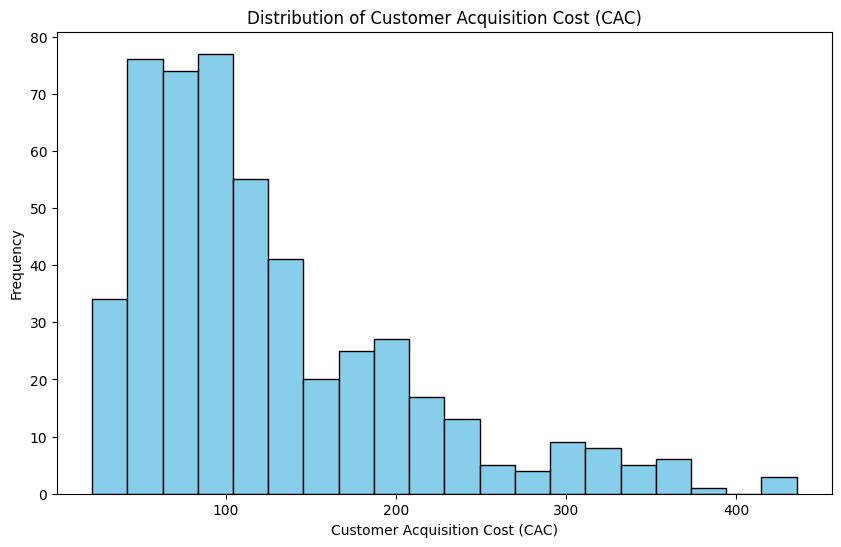

In [10]:
## Average spend to acquire new customer
# Calculate CAC
data['CAC'] = data['Marketing_Spend'] / data['New_Customers']

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data['CAC'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Acquisition Cost (CAC)')
plt.xlabel('Customer Acquisition Cost (CAC)')
plt.ylabel('Frequency')

plt.show()


In [11]:
## Checking for the actual values in the columns
unique_values = data.apply(lambda x: x.unique())
print(unique_values)

Customer_ID          [CUST0001, CUST0002, CUST0003, CUST0004, CUST0...
Marketing_Channel    [Email Marketing, Online Ads, Social Media, Re...
Marketing_Spend      [3489.027844, 1107.865808, 2576.081025, 3257.5...
New_Customers        [16, 33, 44, 32, 13, 35, 27, 22, 17, 39, 15, 2...
CAC                  [218.06424025, 33.571691151515154, 58.54729602...
dtype: object


In [12]:
# Calculate the total value for each Marketing Channel
total_cac_value_by_channel = data.groupby('Marketing_Channel')['CAC'].sum()

# Display the result
print(total_cac_value_by_channel)

Marketing_Channel
Email Marketing    16481.306045
Online Ads         15877.671960
Referral           15346.198311
Social Media       14889.465778
Name: CAC, dtype: float64


In [13]:

# Provided data
data = {
    'Marketing_Channel': ['Email Marketing', 'Online Ads', 'Referral', 'Social Media'],
    'Marketing_Spend': [16481.306045, 15877.671960, 15346.198311, 14889.465778]
}

# Convert the data dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Create a bar chart where y is Marketing Spend and x is Marketing Channels
fig = px.bar(df, x='Marketing_Channel', y='Marketing_Spend', title='Marketing Spend by Channel')

# Customize layout to adjust chart size
fig.update_layout(
    title='Marketing Spend Distribution',
    title_x=0.5,  # Set title to be at the top center
    width=600,    # Set width of the chart
    height=400    # Set height of the chart
)

# Show the figure
fig.show()


In [14]:


# Provided data
data = {
    'Marketing_Channel': ['Email Marketing', 'Online Ads', 'Referral', 'Social Media'],
    'Marketing_Spend': [16481.306045, 15877.671960, 15346.198311, 14889.465778]
}

# Convert the data dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Create a bar chart where x is Marketing Channels and y is Marketing Spend
fig = px.bar(df, x='Marketing_Channel', y='Marketing_Spend', title='Marketing Spend Distribution',
             color='Marketing_Channel',  # Color based on Marketing Channel
             color_discrete_sequence=px.colors.sequential.Viridis)  # Set color palette to 'viridis'

# Customize layout to adjust chart size
fig.update_layout(
    title_x=0.5,  # Set title to be at the top center
    width=600,    # Set width of the chart
    height=400    # Set height of the chart
)

# Show the figure
fig.show()


In [15]:

# Provided data
data = {
    'Marketing_Channel': ['Email Marketing', 'Online Ads', 'Referral', 'Social Media'],
    'Marketing_Spend': [16481.306045, 15877.671960, 15346.198311, 14889.465778]
}

# Create a pie chart
fig = px.pie(data, names='Marketing_Channel', values='Marketing_Spend', hole=0.3)

# Customize layout to adjust chart size and title position
fig.update_layout(
    title='Marketing Spend Distribution',
    title_x=0.5,  # Set title to be at the top center
    width=600,    # Set width of the chart
    height=400    # Set height of the chart
)

# Show the figure
fig.show()


CAC value helping the company understand how efficiently it is acquiring customers through its marketing efforts and 
which marketing channels are more cost-effective for customer acquisition

The customer acquisition cost of Email marketing is the highest and social media is the lowest

In [16]:
import plotly.express as px

# Provided data
data = {
    'Marketing_Channel': ['Email Marketing', 'Online Ads', 'Referral', 'Social Media'],
    'Marketing_Spend': [16481.306045, 15877.671960, 15346.198311, 14889.465778]
}

# Create a pie chart
fig = px.pie(data, names='Marketing_Channel', values='Marketing_Spend', hole=0.3,
             color_discrete_sequence=px.colors.sequential.Viridis)  # Set color palette to 'viridis'

# Customize layout to adjust chart size and title position
fig.update_layout(
    title='Marketing Spend Distribution',
    title_x=0.5,  # Set title to be at the top center
    width=600,    # Set width of the chart
    height=400    # Set height of the chart
)

# Show the figure
fig.show()


In [17]:


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['New_Customers'], data['CAC'], alpha=0.5)
plt.title('Relationship between New Customers Acquired and CAC')
plt.xlabel('New Customers Acquired')
plt.ylabel('Customer Acquisition Cost (CAC)')
plt.grid(True)
plt.show()


KeyError: 'New_Customers'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Check the column names in your DataFrame
print(data.columns)


Index(['Customer_ID', 'Marketing_Channel', 'Marketing_Spend', 'New_Customers',
       'CAC'],
      dtype='object')


In [ ]:
fig2 = px.scatter(data, x='New_Customers', 
                  y='CAC', color='Marketing_Channel', 
                  title='New Customers vs. CAC', 
                  trendline='ols')

fig2.update_layout(
    title={'text': 'New Customers vs. CAC', 'x': 0.5, 'y': 0.95},  # Title position adjusted
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

fig2.show()

The downward slope of the trendline in the depicted graph indicates a correlation where channels attracting more new customers tend to have lower Customer Acquisition Costs (CAC). This implies that as marketing strategies prove more successful in customer acquisition, the average cost per customer tends to decline.

In [ ]:
## Descriptive statistics for the CAC within each marketing channel, allowing for a comparative analysis of CAC across different channels

summary_stats = data.groupby('Marketing_Channel')['CAC'].describe().T
print(summary_stats)

Marketing_Channel  Email Marketing  Online Ads    Referral  Social Media
count                   124.000000  130.000000  128.000000    118.000000
mean                    132.913758  122.135938  119.892174    126.181913
std                      89.597107   79.543793   74.101916     77.498788
min                      23.491784   24.784414   22.012364     21.616453
25%                      68.226195   62.207753   71.347939     75.633389
50%                     106.940622   97.736027   99.835688    102.620356
75%                     177.441898  163.469540  137.577935    167.354709
max                     434.383446  386.751285  366.525209    435.487346


In [ ]:
# Statistical description and understanding of dispersion of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing_Spend,500.0,3094.726549,1136.628605,1010.702890,2131.835093,3155.976674,4027.494116,4999.631314
New_Customers,500.0,30.070000,11.754209,10.000000,19.000000,31.000000,40.000000,50.000000
CAC,500.0,125.189284,80.280164,21.616453,67.933448,101.535848,165.633818,435.487346


In [ ]:
## Calculation of the conversion rate of this marketing campaign

data['Conversion_Rate'] = data['New_Customers'] / data['Marketing_Spend']


In [ ]:
Conversion_Rate = data['New_Customers'] / data['Marketing_Spend']
print(Conversion_Rate*100)

0      0.458580
1      2.978700
2      1.708021
3      0.982328
4      1.172853
         ...   
495    1.680130
496    0.725187
497    0.432661
498    0.583064
499    0.904609
Length: 500, dtype: float64


C:\Users\kater\AppData\Local\Temp\ipykernel_6992\2171928045.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




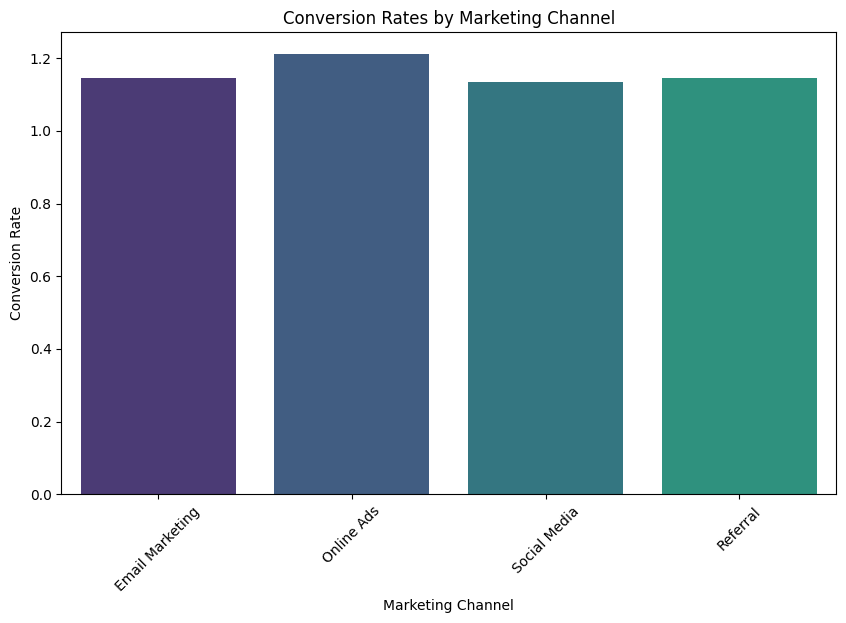

In [ ]:

# Calculate Conversion Rate
data['Conversion_Rate'] = (data['New_Customers'] / data['Marketing_Spend'])*100

# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create the bar chart using Seaborn with different colors for each marketing channel
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Marketing_Channel', y='Conversion_Rate',hue='Marketing_Channel', ci=None)
plt.title('Conversion Rates by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Conversion Rate')
#plt.legend(title='Marketing Channel')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [ ]:

# Calculate Conversion Rate
data['Conversion_Rate'] = data['New_Customers'] / data['Marketing_Spend']

fig = px.bar(data, x='Marketing_Channel', 
             y='Conversion_Rate', 
             title='Conversion Rates by Marketing Channel',
             color='Marketing_Channel',  # Assign color based on Marketing Channel
             color_discrete_map={          # Define color mapping for each Marketing Channel
                 'Email Marketing': 'blue',
                 'Online Ads': 'green',
                 'Social Media': 'orange',
                 'Referral': 'red'
             })
fig.show()



Break-even customers are the quantity of fresh clientele a company must obtain via a particular marketing avenue to offset the expenses linked with that channel. If the number of new customers secured through the channel surpasses the break-even threshold, it signifies that the marketing endeavors are yielding revenue surpassing the costs, thus leading to profitability.

C:\Users\kater\AppData\Local\Temp\ipykernel_6992\1353417039.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




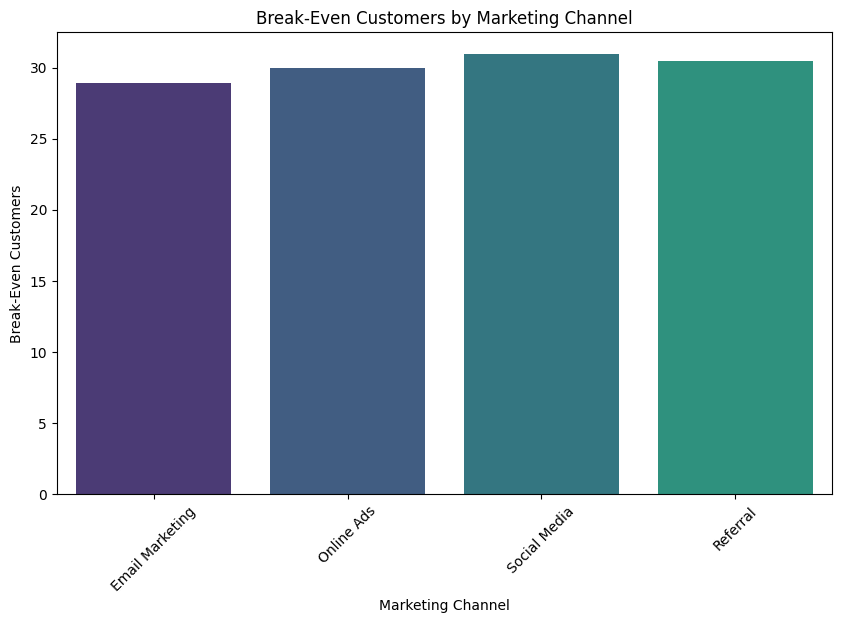

In [ ]:

# Calculate Break-Even Customers
data['Break_Even_Customers'] = data['Marketing_Spend'] / data['CAC']

# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Marketing_Channel', y='Break_Even_Customers', hue='Marketing_Channel', ci=None)
plt.title('Break-Even Customers by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Break-Even Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Set the color palette to 'viridis'
sns.set_palette('viridis')



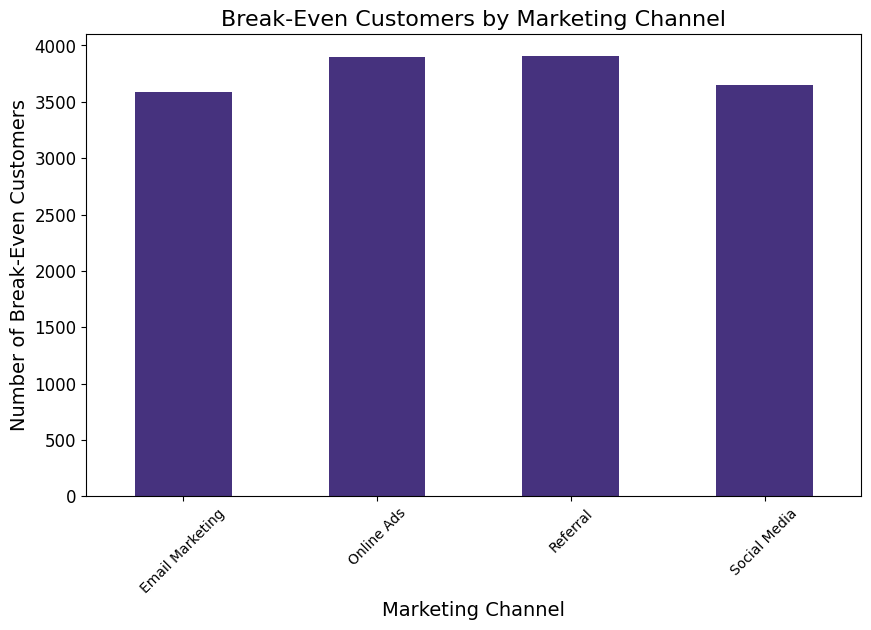

In [ ]:

# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create the bar chart
plt.figure(figsize=(10, 6))
data.groupby('Marketing_Channel')['Break_Even_Customers'].sum().plot(kind='bar', figsize=(10, 6))

plt.title('Break-Even Customers by Marketing Channel', fontsize=16)
plt.xlabel('Marketing Channel', fontsize=14)
plt.ylabel('Number of Break-Even Customers', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust y-axis tick font size


plt.show()

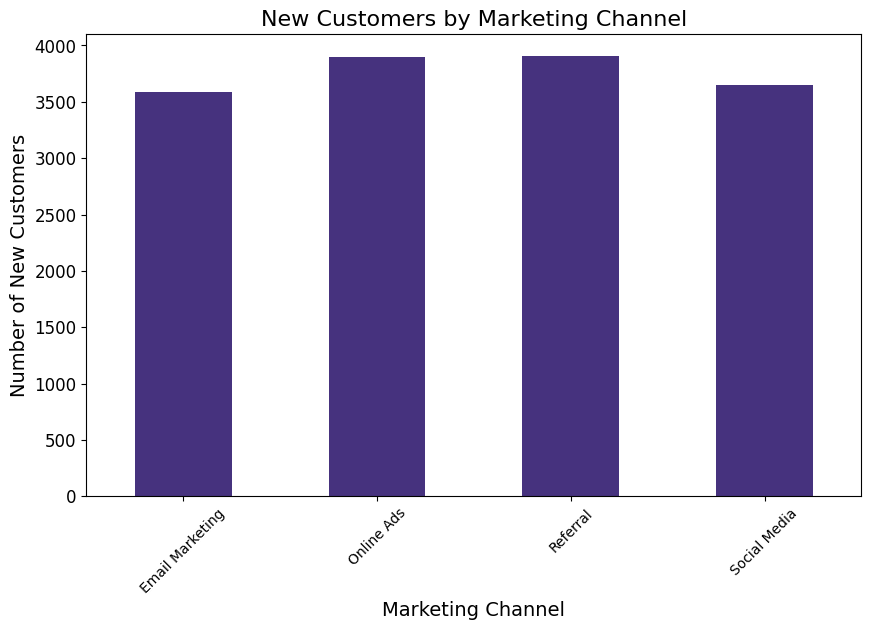

In [ ]:
## Compare the actual customers acquired with the break-even customers for each marketing channel

# Set the color palette to 'viridis'
sns.set_palette('viridis')

# Create the bar chart
plt.figure(figsize=(10, 6))
data.groupby('Marketing_Channel')['New_Customers'].sum().plot(kind='bar', figsize=(10, 6))

plt.title('New Customers by Marketing Channel', fontsize=16)
plt.xlabel('Marketing Channel', fontsize=14)
plt.ylabel('Number of New Customers', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust y-axis tick font size


plt.show()

In [ ]:
fig = go.Figure()

# Actual Customers Acquired
fig.add_trace(go.Bar(x=data['Marketing_Channel'], y=data['New_Customers'],
                     name='Actual Customers Acquired', marker_color='purple'))

# Break-Even Customers
fig.add_trace(go.Bar(x=data['Marketing_Channel'], y=data['Break_Even_Customers'],
                     name='Break-Even Customers', marker_color='lightgreen'))

# Update the layout
fig.update_layout(barmode='group', title='Actual vs. Break-Even Customers by Marketing Channel',
                  xaxis_title='Marketing Channel', yaxis_title='Number of Customers')

# Show the chart
fig.show()

 The actual customers acquired from all marketing channels exactly match the break-even customers. If the actual customers acquired were short of the break-even point, it would have indicated a need to reassess marketing strategies or allocate additional resources to those channels.

In [ ]:
data.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,Conversion_Rate,Break_Even_Customers
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580,16.0
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700,33.0
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021,44.0
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328,32.0
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853,13.0


In [ ]:
New_Customer_Acquisition = pd.DataFrame(data)
# Save the DataFrame to a CSV file
New_Customer_Acquisition.to_csv('new_cac_dataset.csv', index=False)

In [ ]:
New_Customer_Acquisition.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,Conversion_Rate,Break_Even_Customers
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580,16.0
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700,33.0
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021,44.0
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328,32.0
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853,13.0
